# Telco Customer Churn

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

## The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents.

Reference : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# Save file path to variable
file = Path("Clean_Telco-Customer-Churn.csv")

# Read with Pandas
Churn_df = pd.read_csv(file)
Churn_df.head()

,CustomerID,Gender,LifePartner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Create DataFame
cust_churn_df = pd.DataFrame(Churn_df)
cust_churn_df

,CustomerID,Gender,LifePartner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,Yes,Yes,24,Yes,DSL,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,Yes,Yes,72,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,Yes,Yes,11,No,DSL,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,Yes,No,4,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Exploratory Data Analysis

## Explore the target variable
Here the target variable is "Churn"

In [4]:
# Display distribution of Churn rate
target = cust_churn_df["Churn"].value_counts().to_frame()
target 


,count
Churn,
No,5163
Yes,1869


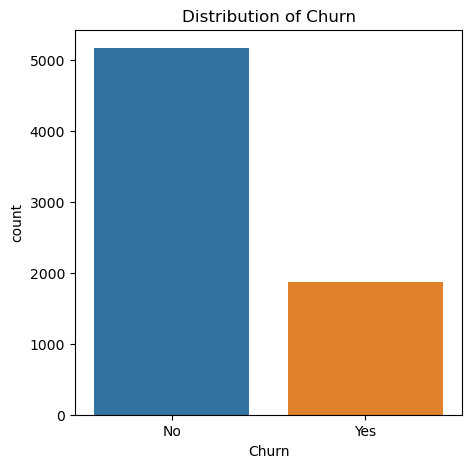

In [5]:
# plot the Churn distribution
plt.figure(figsize = (5,5))
plt.title("Distribution of Churn")
plot = sns.countplot(x = cust_churn_df["Churn"],                     
                    linewidth = 2,
                    )
plt.show()

Above plot predicts customes that left the company in the previous month. It shows imbalnce of the data between churners and non churners. Resampling would be a suitable approach. 
* Churn: No = 73%
* Churn: Yes = 26.5%



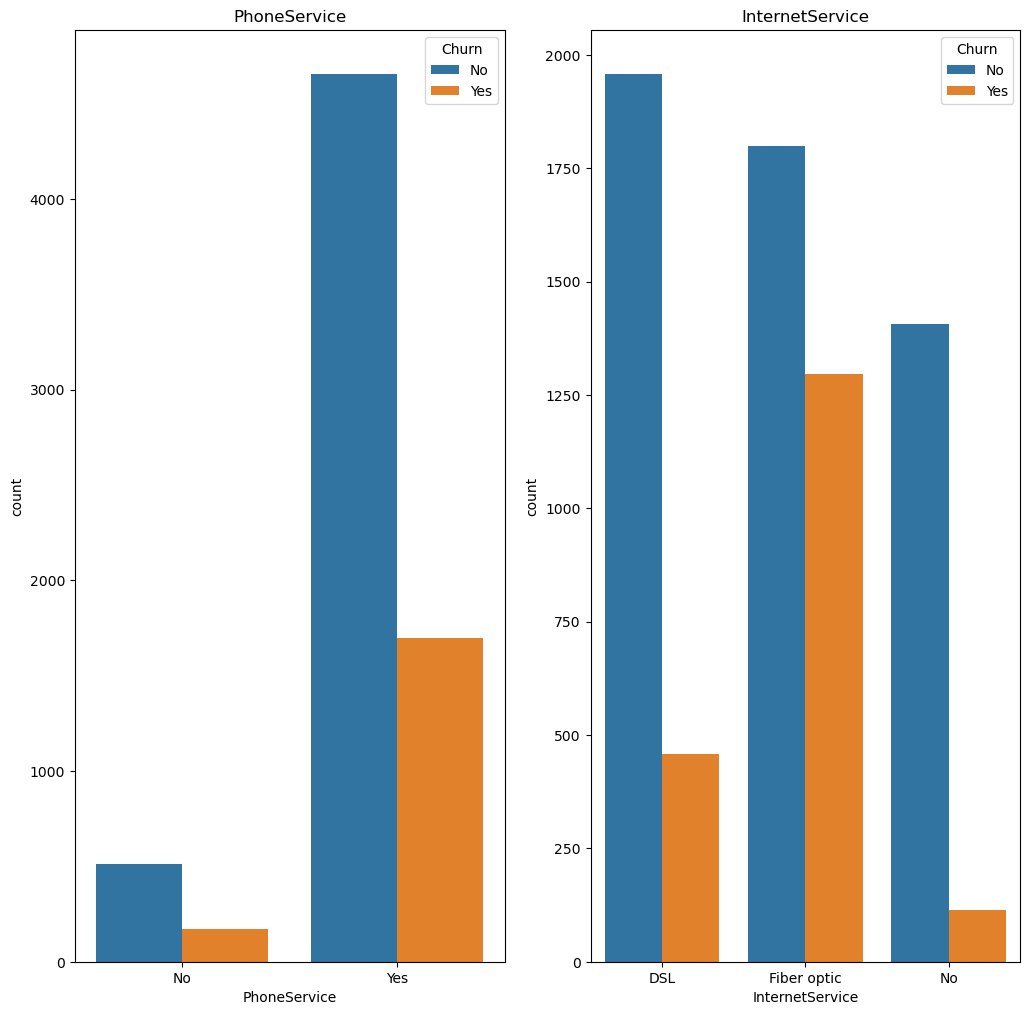

In [6]:
# Generate Countplots:

plots = {1: [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

# Create a function to generate countplots
def count_plots(x, y, cust_churn_df):
    
    r = int(str(plots[len(y)][0]))
    c = int(str(plots[len(y)][1]))
            
    plt.figure(figsize=(0.10*c, 0.10*r))
    
    for i, element in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=element, hue=x, data=cust_churn_df)
        ax.set_title(element)
            
    plt.show()
            
# Generate plots
count_plots("Churn", ["PhoneService", "InternetService"], cust_churn_df)

In [7]:
# Drop the customer-ID 
cust_churn_df = cust_churn_df.drop(columns ="CustomerID")

# Label Encoding


In [8]:
label_encoder=LabelEncoder()
for c in cust_churn_df.columns:   ## Here c represents column
    cust_churn_df[c] = label_encoder.fit_transform(cust_churn_df[c])

cust_churn_df.head(10)

,Gender,LifePartner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,0,0,1,2,142,74,0
1,1,0,0,33,1,0,1,0,3,497,3624,0
2,1,0,0,1,1,0,0,1,3,435,536,1
3,1,0,0,44,0,0,1,0,0,266,3570,0
4,0,0,0,1,1,1,0,1,2,728,674,1
5,0,0,0,7,1,1,0,1,2,1273,2173,1
6,1,0,1,21,1,1,0,1,1,1074,3673,0
7,0,0,0,9,0,0,0,0,3,140,1145,0
8,0,1,0,27,1,1,0,1,2,1370,4384,1
9,1,0,1,61,1,0,1,0,0,481,4631,0


#  Correlation analysis

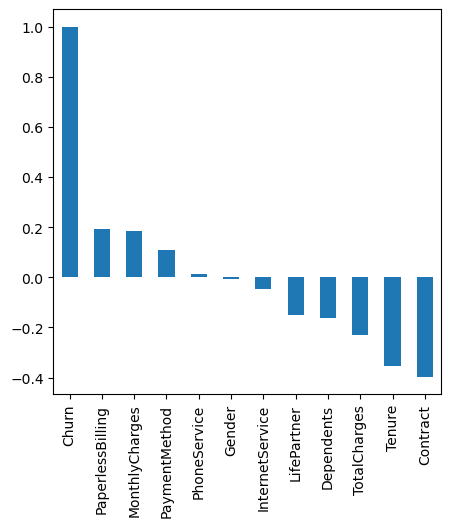

In [9]:
# Plot correlation for correlation of Churn with each of the remaing features.
plt.figure(figsize = (10,5))
corr = cust_churn_df.corr()["Churn"].sort_values(ascending = False)
corr_plot =corr.plot(kind = "bar",
                    figsize = (5,5))

# Train-Test-Split

In [10]:
# Seperate the features, X,  from the target variable(Churn), y
y = cust_churn_df['Churn']
X = cust_churn_df.drop(columns='Churn')

In [11]:
# Preview the features data
X.head()

,Gender,LifePartner,Dependents,Tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,1,2,142,74
1,1,0,0,33,1,0,1,0,3,497,3624
2,1,0,0,1,1,0,0,1,3,435,536
3,1,0,0,44,0,0,1,0,0,266,3570
4,0,0,0,1,1,1,0,1,2,728,674


In [12]:
# Preview the first five entries for the target variable
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [13]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
 X_train.shape

(5274, 11)

In [15]:
 X_test.shape

(1758, 11)

# Scale the data using StandardScaler

In [16]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

# Model Selection, Training, Prediction and Assessment

## K Nearest Neighbors

In [17]:
# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
# Fit the model using the training data.
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# Make predictions using the testing data
y_pred_test = knn.predict(X_test_scaled)
y_pred_train = knn.predict(X_train_scaled)

###  K Nearest Neighbors Model Evaluation

In [20]:
# Print a confusion matrix for the training data
cm = confusion_matrix(y_train, y_pred_train)
cm_df = pd.DataFrame(
    cm, index=["No Churn", "Churn"], columns=["No Churn", "Churn"]
)

print("Confusion Matrix for training data")
display(cm_df)

# Print a confusion matrix for the testing data
cm1 = confusion_matrix(y_test, y_pred_test)
cm1_df = pd.DataFrame(
    cm1, index=["No Churn", "Churn"], columns=["No Churn", "Churn"]
)

print("Confusion Matrix for testing data")
display(cm1_df)
# # Calculating the accuracy score
# acc_score = accuracy_score(y_test, y_pred_test)
# acc_score_train = accuracy_score(y_train, y_pred_train)

Confusion Matrix for training data


,No Churn,Churn
No Churn,3590,279
Churn,439,966


Confusion Matrix for testing data


,No Churn,Churn
No Churn,1118,176
Churn,229,235


In [21]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred_test)
print(f"Accuracy score for TEST data{acc_score}")
acc_score_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy score for TRAIN data{acc_score_train}")


Accuracy score for TEST data0.7696245733788396
Accuracy score for TRAIN data0.8638604474781949


Accuracy Score Train : 0.8638604474781949(y_train, y_pred_train)

Classification Report for test data
------------------------------------
              precision    recall  f1-score   support

   not churn       0.89      0.93      0.91      3869
       churn       0.78      0.69      0.73      1405

    accuracy                           0.86      5274
   macro avg       0.83      0.81      0.82      5274
weighted avg       0.86      0.86      0.86      5274



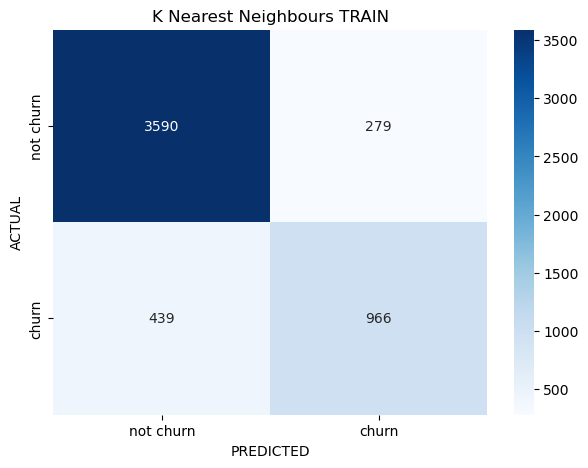

In [22]:
# Print the training classification report.
cm1_model = confusion_matrix(y_train, y_pred_train)

labels=["not churn", "churn"]

# Generate classification report comparing the testing data to the model predictions
print(f"Accuracy Score Train : {acc_score_train}(y_train, y_pred_train)\n")

print("Classification Report for test data")
print("--"*18)

print(classification_report(y_train, y_pred_train, target_names = labels))
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm1_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('K Nearest Neighbours TRAIN')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

Accuracy Score Test : 0.7696245733788396(y_test, y_pred_test)

Classification Report for test data
------------------------------------
              precision    recall  f1-score   support

   not churn       0.83      0.86      0.85      1294
       churn       0.57      0.51      0.54       464

    accuracy                           0.77      1758
   macro avg       0.70      0.69      0.69      1758
weighted avg       0.76      0.77      0.76      1758



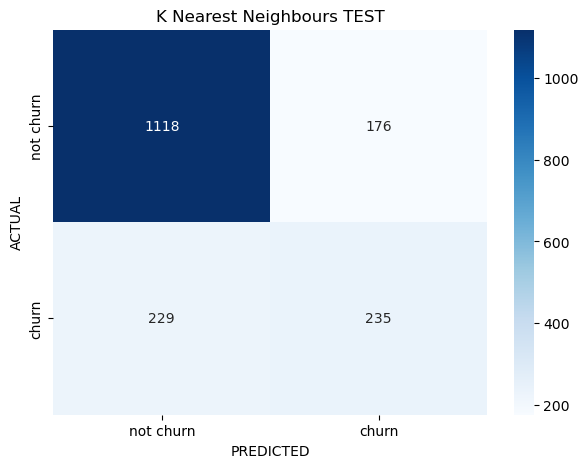

In [23]:
# Print the testing classification report.
cm_model = confusion_matrix(y_test, y_pred_test)

labels=["not churn", "churn"]

# Generate classification report comparing the testing data to the model predictions
print(f"Accuracy Score Test : {acc_score}(y_test, y_pred_test)\n")

print("Classification Report for test data")
print("--"*18)

print(classification_report(y_test, y_pred_test, target_names = labels))
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('K Nearest Neighbours TEST')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()